# Notas originales: [12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)

# Convección no lineal 2D
-------------------
El siguiente paso es acoplar dos velocidades. Sean $u$ y $v$ el campo de velocidades en las direcciones $x$ e $y$ respectivamente, de modo que

\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0,
\end{equation}
\begin{equation}
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0,
\end{equation}

la principal diferencia es que ahora tenemos dos ecuaciones diferenciales acopladas. Lo siguiente es similar, adimensionalizar y discretizar de forma separada para obtener

\begin{equation}
\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} + u^{n}_{i,j} \frac{u^{n}_{i,j} - u^{n}_{i-1,j}}{\Delta t} + v^{n}_{i,j} \frac{u^{n}_{i,j} - u^{n}_{i,j-1}}{\Delta t} = 0,
\end{equation}

\begin{equation}
\frac{v^{n+1}_{i,j} - v^{n}_{i,j}}{\Delta t} + u^{n}_{i,j} \frac{v^{n}_{i,j} - v^{n}_{i-1,j}}{\Delta t} + v^{n}_{i,j} \frac{v^{n}_{i,j} - v^{n}_{i,j-1}}{\Delta t} = 0,
\end{equation}

despejando para $u^{n+1}_{i,j},$ $v^{n+1}_{i,j}$ podemos avanzar en el tiempo

\begin{equation}
u^{n+1}_{i,j} = u^{n}_{i,j} - u_{i,j} \frac{\Delta t}{\Delta x} (u^{n}_{i,j} - u^{n}_{i-1,j}) - v^{n}_{i,j} \frac{\Delta t}{\Delta y} (u^{n}_{i,j} - u^{n}_{i,j-1}),
\end{equation}
y
\begin{equation}
v^{n+1}_{i,j} = v^{n}_{i,j} - u_{i,j} \frac{\Delta t}{\Delta x} (v^{n}_{i,j} - v^{n}_{i-1,j}) - v^{n}_{i,j} \frac{\Delta t}{\Delta y} (v^{n}_{i,j} - v^{n}_{i,j-1}).
\end{equation}

El siguiente ejemplo es para un pulso en dos dimensiones.

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
def pulso(x0, x1, y0, y1, x, y):
  if (x0 < x and x < x1) and (y0 < y and y < y1):
    return 1.0
  else:
    return 0.0

#variables utiles
nx = 101
ny = 101
#nt = 80
c = 1
Lx = 2
Ly = 2
dx = Lx / (nx-1)
dy = Ly / (ny -1)
CFL = .2
dt = CFL*dx

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

#vector de unos
u = np.ones((nx, ny))
v = np.ones((nx, ny))
un = np.ones((nx, ny))
vn = np.ones((nx, ny))

#condiciones iniciales
for i in range(nx):
  for j in range(ny):
    u[i,j] += pulso(0.5, 1.0, 0.5, 1.0, x[i], y[j])
    v[i,j] += pulso(0.5, 1.0, 0.5, 1.0, x[i], y[j])

Text(0.5, 0, '$y$')

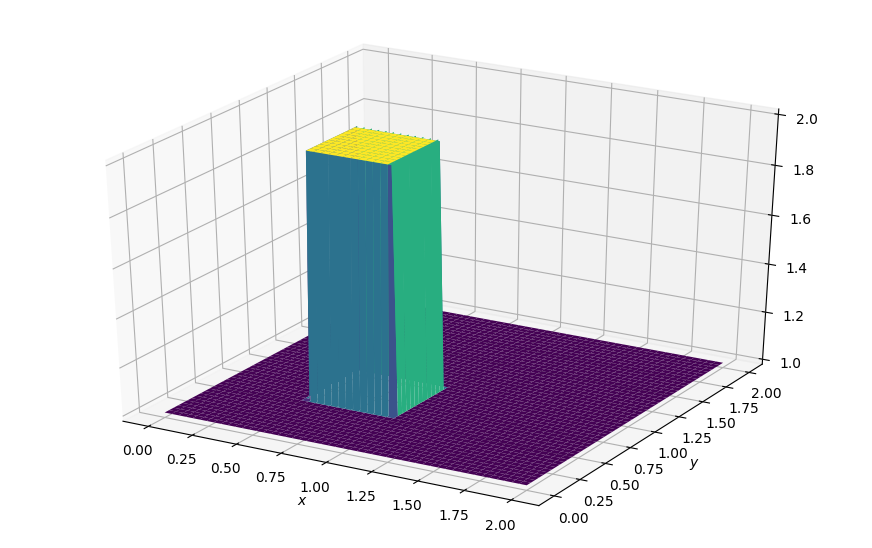

In [0]:
fig = plt.figure(figsize=(11, 7), dpi = 100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [0]:
def conveccion_no_lineal_2D(nt):
  for n in range(nt + 1):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx):
      for j in range(1, ny):
        u[i, j] = un[i, j] - un[i, j]*dt*(un[i, j] - un[i-1, j])/dx - vn[i, j]*dt*(un[i, j] - un[i, j-1])/dy
        v[i, j] = vn[i, j] - vn[i, j]*dt*(un[i, j] - vn[i-1, j])/dx - vn[i, j]*dt*(un[i, j] - vn[i, j-1])/dy

      #condiciones iniciales
      u[0,:] = 1.0
      u[-1,:] = 1.0
      u[:,0] = 1.0
      u[:,-1] = 1.0

      v[0,:] = 1.0
      v[-1,:] = 1.0
      v[:,0] = 1.0
      v[:,-1] = 1.0

  fig = plt.figure(figsize=(11, 7), dpi = 100)
  ax = fig.gca(projection='3d')
  X, Y = np.meshgrid(x, y)
  ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')

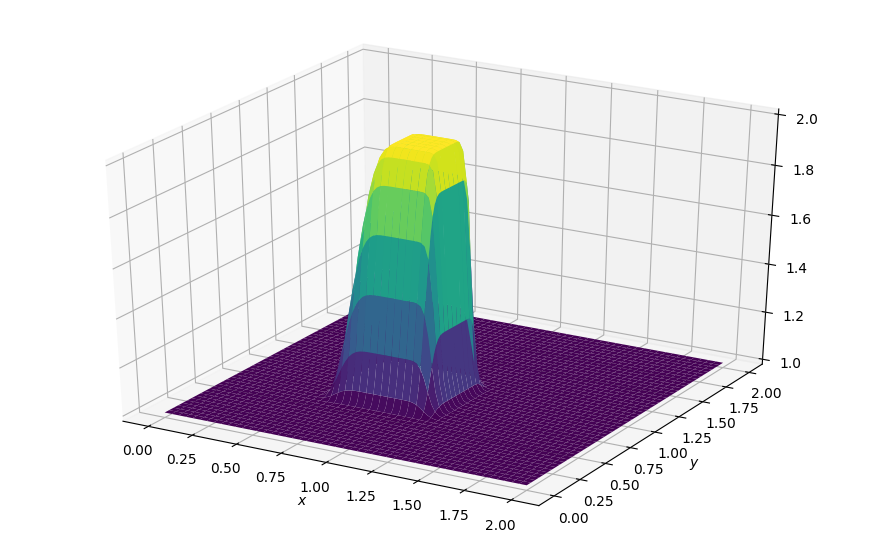

In [0]:
conveccion_no_lineal_2D(10)

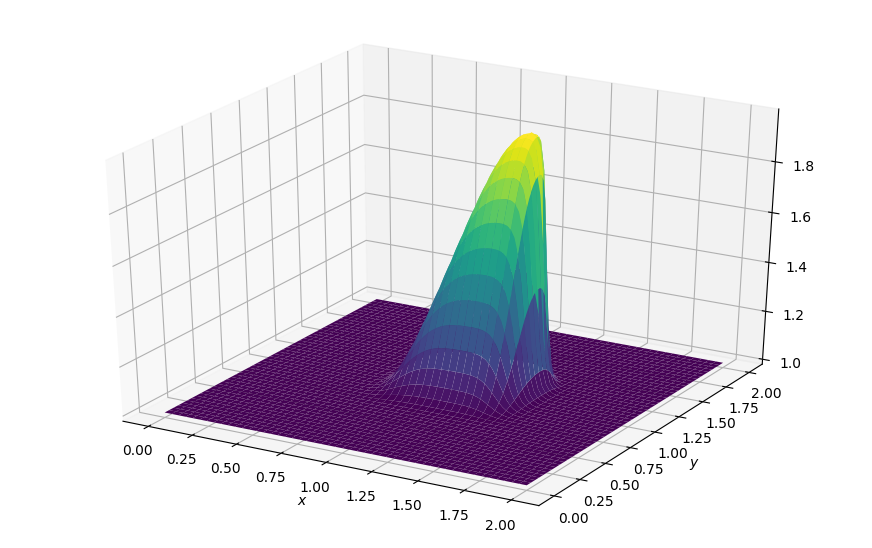

In [0]:
conveccion_no_lineal_2D(50)